Decision Trees

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from utils import *

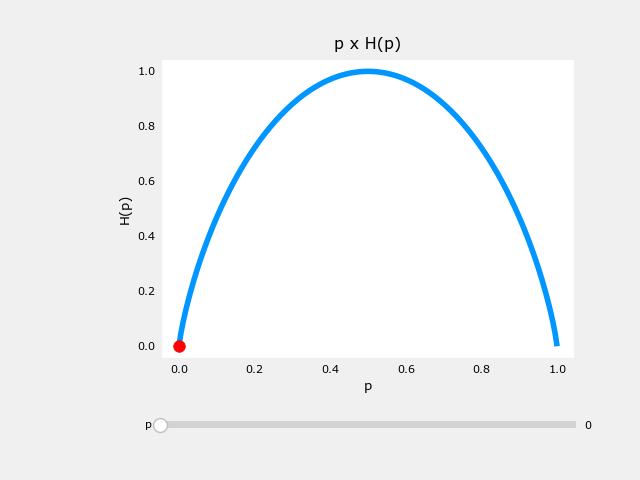

In [2]:
%matplotlib widget
_ = plot_entropy()

|                                                     |   Ear Shape | Face Shape | Whiskers |   Cat  |
|:---------------------------------------------------:|:---------:|:-----------:|:---------:|:------:|
| <img src="./images/0.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Present  |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Pointy   |  Not Round  |  Present  |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Present  |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |   Pointy   |   Round     |  Absent   |    1   |
| <img src="images/6.png" alt="drawing" width="50"/> |   Floppy   |  Not Round  |  Absent   |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Pointy   |  Round      |  Absent   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Floppy  |   Round     |  Absent   |    0   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Floppy   |  Round      |  Absent   |    0   |


We will use **one-hot encoding** to encode the categorical features. They will be as follows:

- Ear Shape: Pointy = 1, Floppy = 0
- Face Shape: Round = 1, Not Round = 0
- Whiskers: Present = 1, Absent = 0

Therefore, we have two sets:

- `X_train`: for each example, contains 3 features:
            - Ear Shape (1 if pointy, 0 otherwise)
            - Face Shape (1 if round, 0 otherwise)
            - Whiskers (1 if present, 0 otherwise)
            
- `y_train`: whether the animal is a cat
            - 1 if the animal is a cat
            - 0 otherwise

In [3]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [4]:
X_train[0]

array([1, 1, 1])

In [5]:
def entropy(p):
    if p == 0 or p==1:
        return 0
    else:
        return -p*np.log2(p) - (1 - p)*np.log2(1 - p)

print(entropy(0.5))

1.0


In [6]:
def split_indices(X, index_feature):
    left_indices = []
    right_indices = []

    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [7]:
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [8]:
def weighted_entropy(X,y,left_indices,right_indices):
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)

    return weighted_entropy

In [9]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

In [10]:
def information_gain(X, y , left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y ,left_indices, right_indices)
    return h_node - w_entropy

In [11]:
information_gain(X_train, y_train, left_indices, right_indices)

0.2780719051126377

In [12]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


 Depth 0, Root: Split on feature: 0
 - Left leaf node with indices [0, 3, 4, 5, 7]
 - Right leaf node with indices [1, 2, 6, 8, 9]


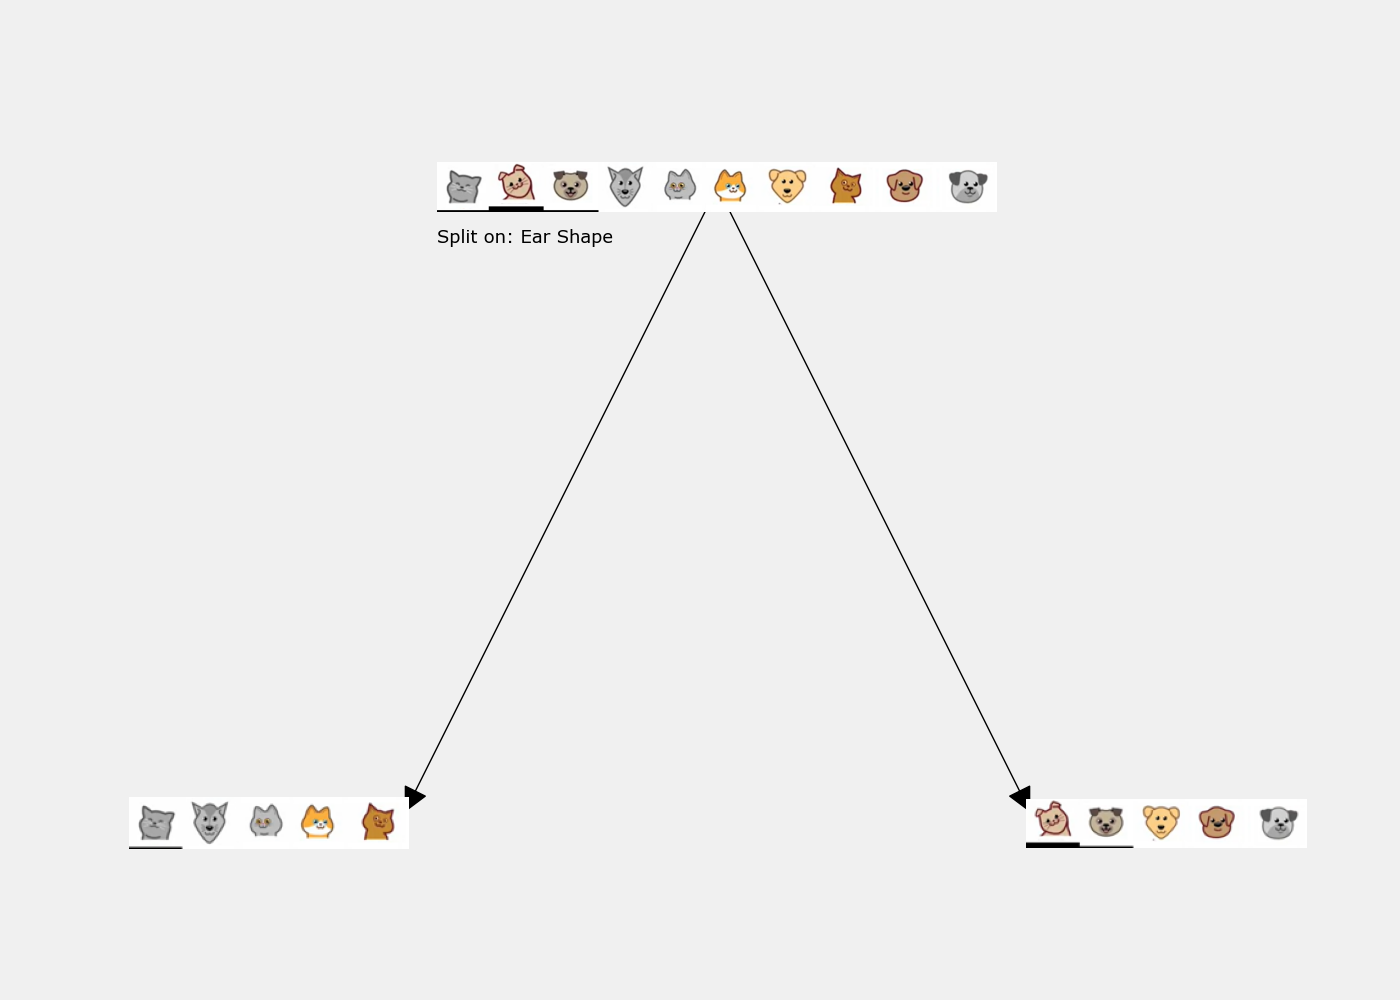

In [13]:
tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=1, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]


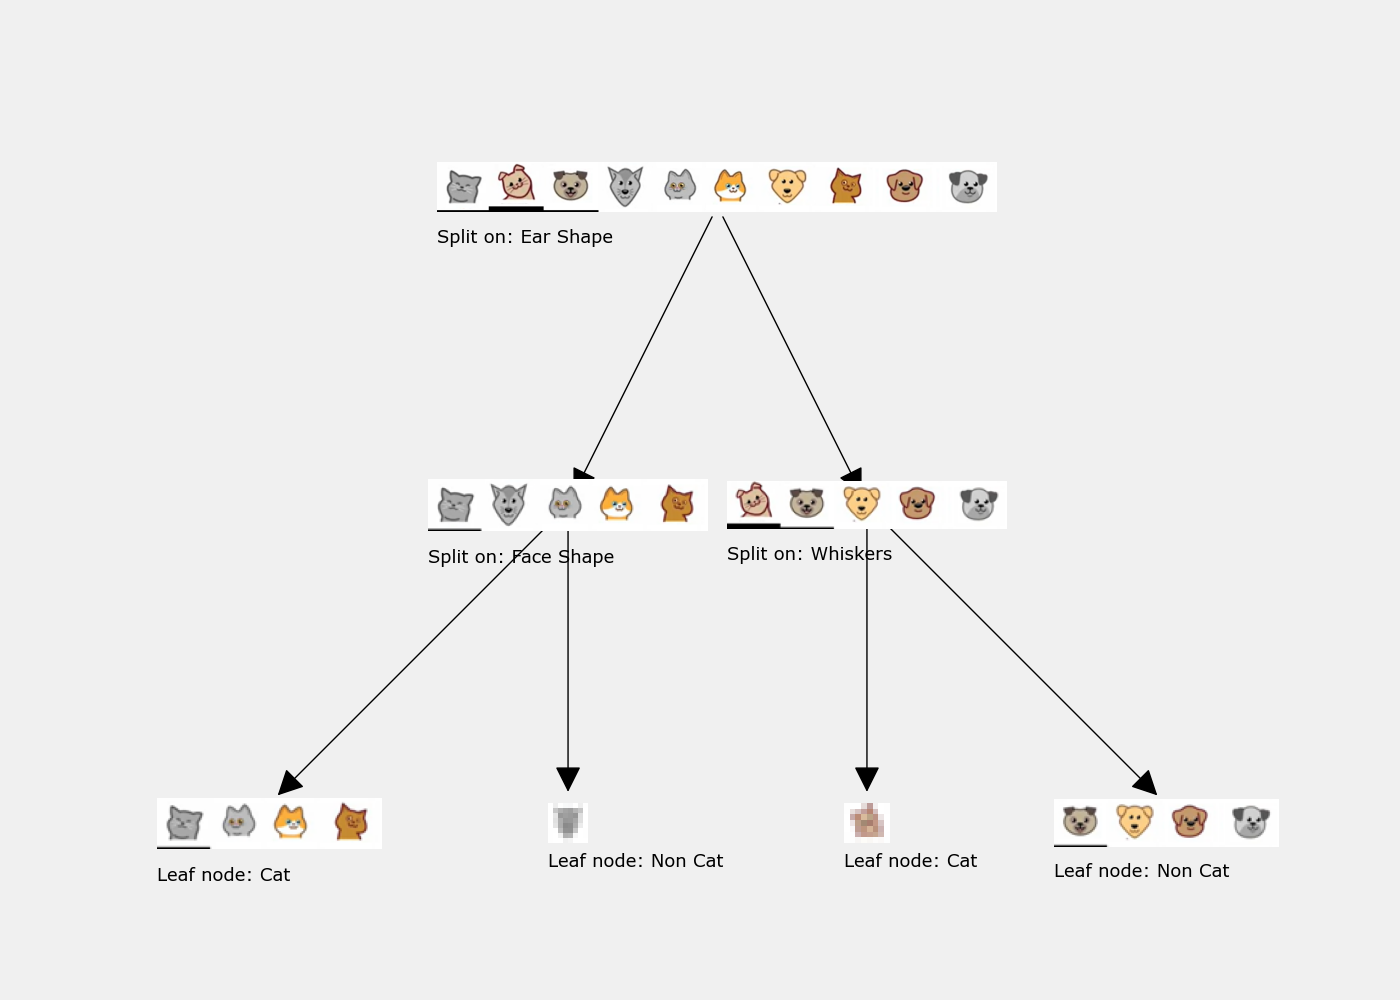

In [14]:
tree = []
build_tree_recursive(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=2, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)